Task A (2 and 3)


Processing language: Marathi


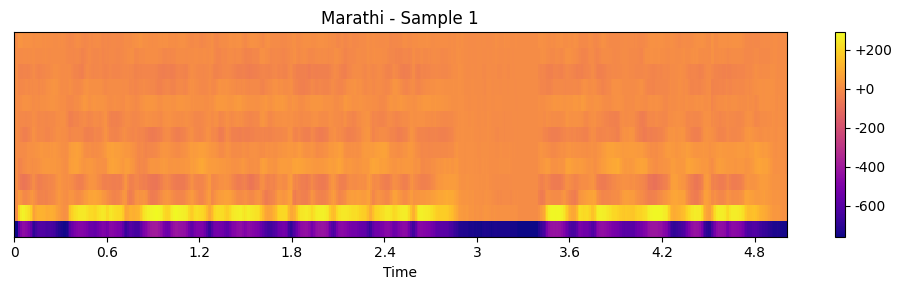

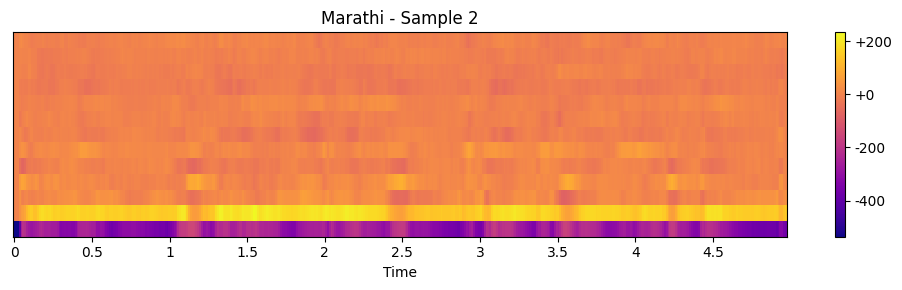

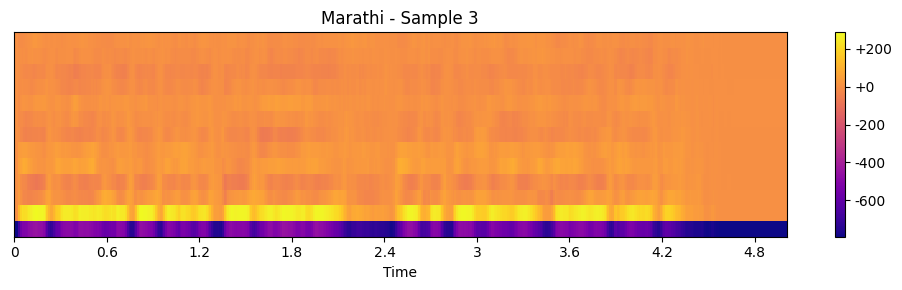


Processing language: Punjabi


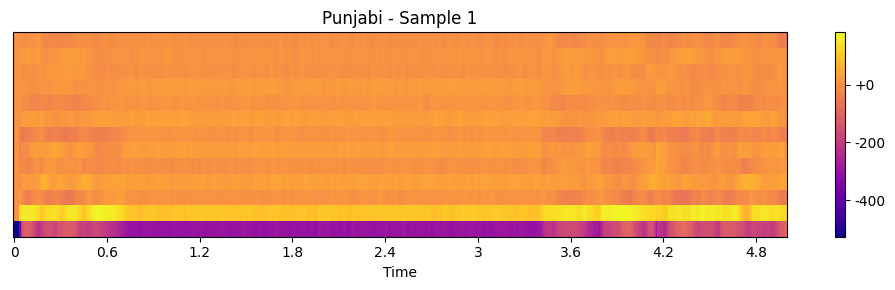

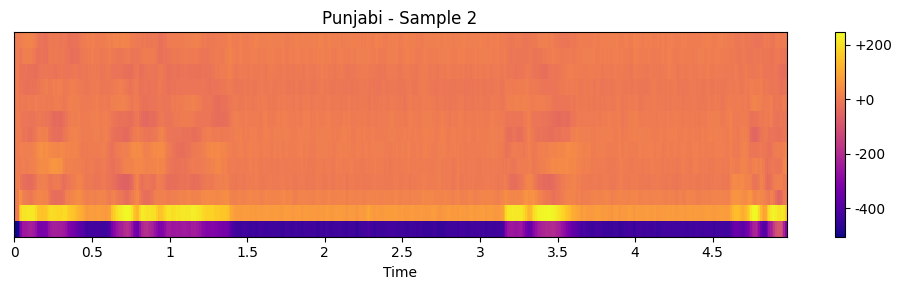

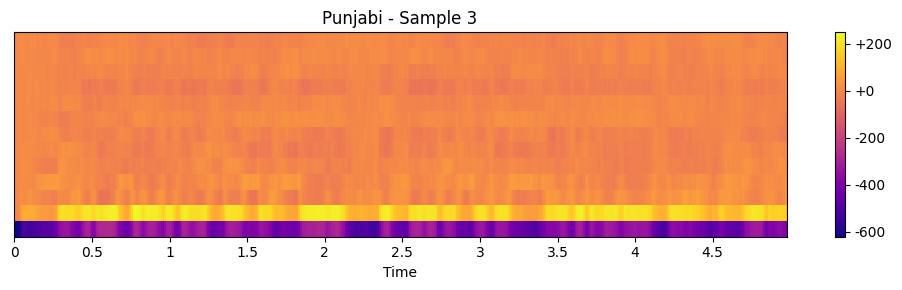


Processing language: Hindi


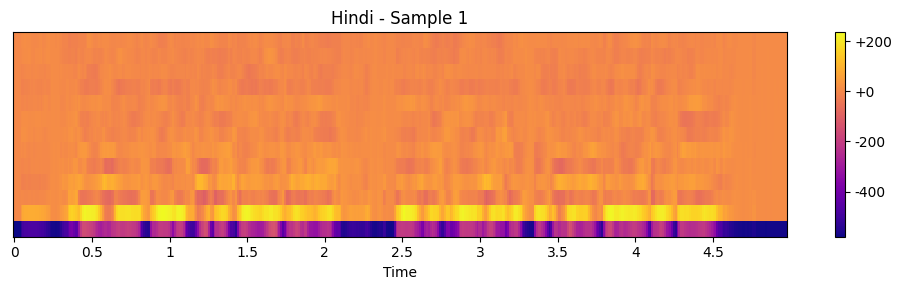

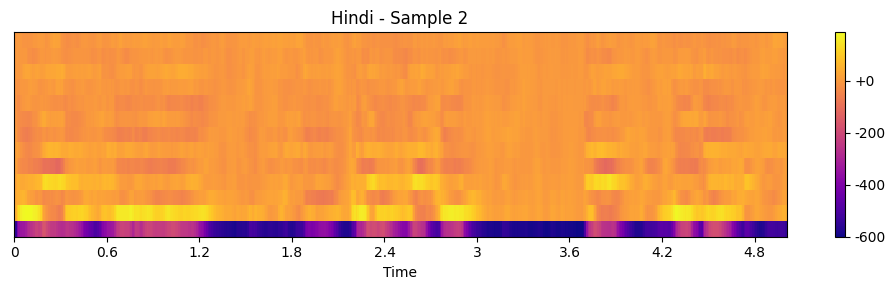

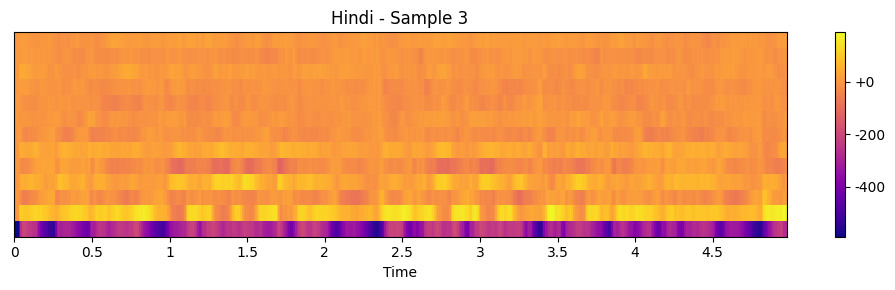

In [18]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define languages and number of samples per language to process
LANGUAGES = ["Marathi", "Punjabi", "Hindi"]
DATA_DIR = "Language Detection Dataset"
SAMPLES_PER_LANG = 3

def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc, sr

def plot_mfcc(mfcc, sr, title):
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(mfcc, 
                           x_axis='time',
                           sr=sr,
                           cmap='plasma') 
    plt.colorbar(format='%+2.0f')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
def process_language(lang):
    print(f"\nProcessing language: {lang}")
    lang_path = os.path.join(DATA_DIR, lang)
    files = [f for f in os.listdir(lang_path) if f.endswith(".mp3")][:SAMPLES_PER_LANG]

    all_mfccs = []
    for idx, file in enumerate(files):
        file_path = os.path.join(lang_path, file)
        mfcc, sr = extract_mfcc(file_path)
        all_mfccs.append(mfcc)
        plot_mfcc(mfcc, sr, f"{lang} - Sample {idx+1}")
    
    return all_mfccs

# Main Analysis
all_language_mfccs = {}

for lang in LANGUAGES:
    mfccs = process_language(lang)
    all_language_mfccs[lang] = mfccs


TASK-A (4a)

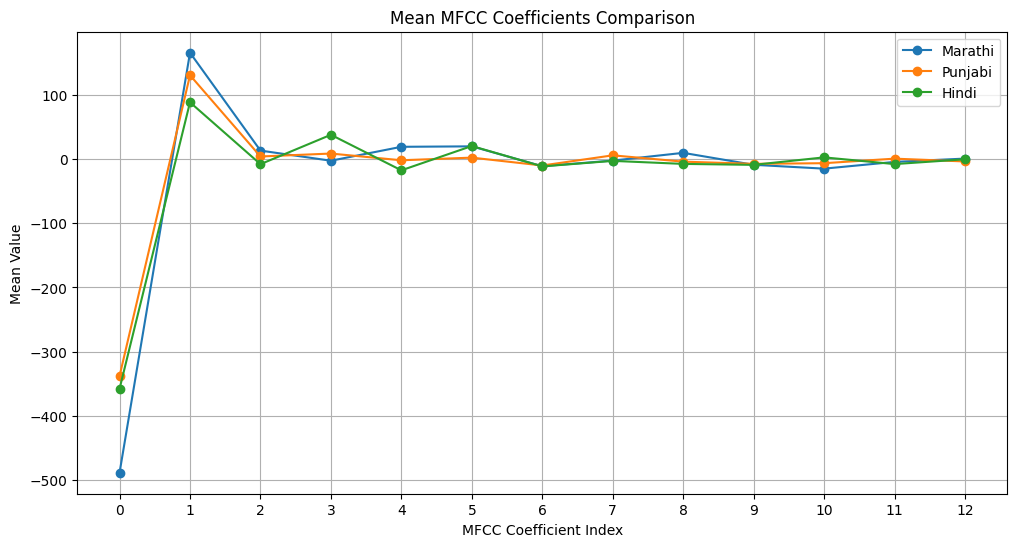

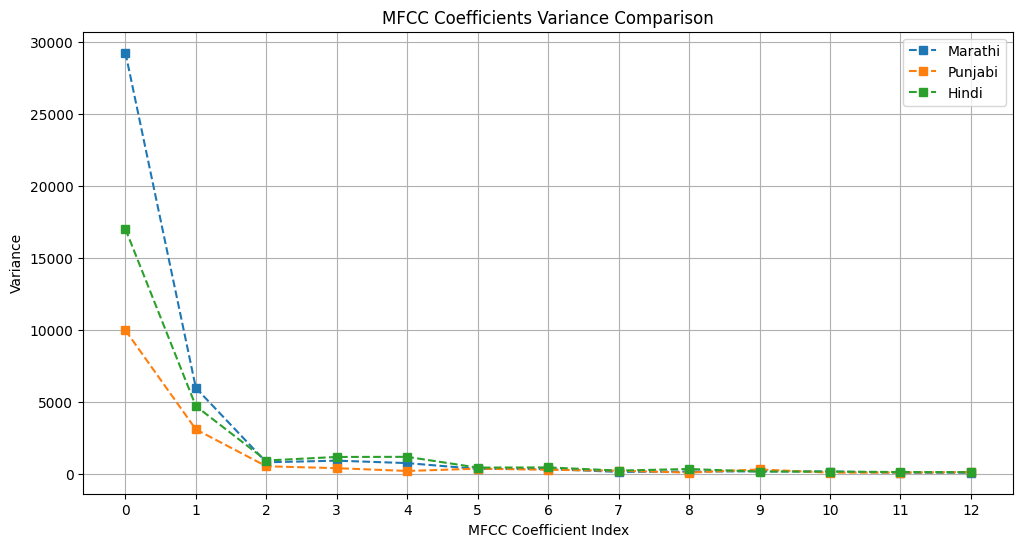


Statistical Summary:
Language   Coeff    Mean            Variance       
--------------------------------------------------
Marathi:
           MFCC 0   -488.2634       29248.2695     
           MFCC 1   165.1015        5963.8188      
           MFCC 2   12.8552         802.7154       
           MFCC 3   -2.9067         915.8083       
           MFCC 4   18.7481         746.0180       
           MFCC 5   19.4528         342.1200       
           MFCC 6   -11.4596        331.4704       
           MFCC 7   -2.7101         134.9082       
           MFCC 8   9.3360          158.4270       
           MFCC 9   -9.2395         173.0944       
           MFCC 10  -15.2336        161.8769       
           MFCC 11  -4.7524         78.2369        
           MFCC 12  0.4221          82.4780        
--------------------------------------------------
Punjabi:
           MFCC 0   -337.8698       9968.1367      
           MFCC 1   130.1186        3087.6982      
           MFCC 2   3.6674

In [19]:
# Statistical Analysis and Visualization

# Compute mean and variance for each language's MFCCs
language_stats = {}
for lang in LANGUAGES:
    # Combine all MFCC frames from all samples for the language
    combined_mfcc = np.hstack(all_language_mfccs[lang])
    
    # Calculate statistics
    mean_mfcc = np.mean(combined_mfcc, axis=1)
    var_mfcc = np.var(combined_mfcc, axis=1)
    
    language_stats[lang] = {
        'mean': mean_mfcc,
        'variance': var_mfcc
    }

# Plot mean MFCC comparison
plt.figure(figsize=(12, 6))
for lang in LANGUAGES:
    plt.plot(language_stats[lang]['mean'], 
             label=f'{lang}', 
             marker='o', 
             linestyle='-')
plt.title('Mean MFCC Coefficients Comparison')
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('Mean Value')
plt.xticks(np.arange(13))
plt.grid(True)
plt.legend()
plt.show()

# Plot variance comparison
plt.figure(figsize=(12, 6))
for lang in LANGUAGES:
    plt.plot(language_stats[lang]['variance'], 
             label=f'{lang}', 
             marker='s', 
             linestyle='--')
plt.title('MFCC Coefficients Variance Comparison')
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('Variance')
plt.xticks(np.arange(13))
plt.grid(True)
plt.legend()
plt.show()

# Tabular comparison
print("\nStatistical Summary:")
print("{:<10} {:<8} {:<15} {:<15}".format(
    'Language', 'Coeff', 'Mean', 'Variance'))
print("-"*50)

for lang in LANGUAGES:
    print(f"{lang}:")
    for i in range(13):
        print("{:<10} {:<8} {:<15.4f} {:<15.4f}".format(
            '', 
            f'MFCC {i}', 
            language_stats[lang]['mean'][i], 
            language_stats[lang]['variance'][i]
        ))
    print("-"*50)

Task B


Classification Report:
               precision    recall  f1-score   support

     Marathi       0.90      0.95      0.93        20
     Punjabi       1.00      0.90      0.95        20
       Hindi       0.95      1.00      0.98        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



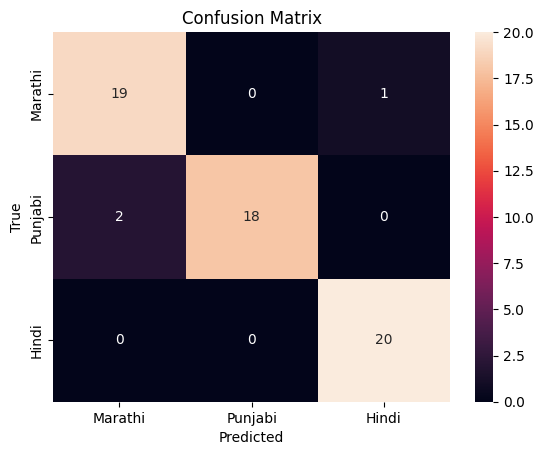

In [9]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Changed import
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

LANGUAGES = ["Marathi", "Punjabi", "Hindi"]
DATA_DIR = "Language Detection Dataset"
N_MFCC = 13
SAMPLES_PER_LANG = 100  # or max available

def extract_features(lang_dir, label):
    features = []
    labels = []
    files = [f for f in os.listdir(lang_dir) if f.endswith(".mp3")][:SAMPLES_PER_LANG]
    for f in files:
        path = os.path.join(lang_dir, f)
        y, sr = librosa.load(path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
        mfcc_mean = np.mean(mfcc, axis=1)
        features.append(mfcc_mean)
        labels.append(label)
    return features, labels

# Step 1: Load and process data
X, y = [], []
for i, lang in enumerate(LANGUAGES):
    lang_dir = os.path.join(DATA_DIR, lang)
    feats, lbls = extract_features(lang_dir, i)
    X.extend(feats)
    y.extend(lbls)

X = np.array(X)
y = np.array(y)

# Step 2: Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Model training with Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Updated to Random Forest
clf.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=LANGUAGES))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=LANGUAGES, yticklabels=LANGUAGES, cmap="rocket")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()